In [ ]:
## Data loading, processing and for more
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
## Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# set seaborn style because it prettier
sns.set()
## Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
## Models
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
# read the data and show first 5 rows
data = pd.read_csv("/content/bs140513_032310.csv")
data.head(5)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0.0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0.0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0.0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0.0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0.0


# New Section

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25925 entries, 0 to 25924
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   step         25925 non-null  int64  
 1   customer     25925 non-null  object 
 2   age          25925 non-null  object 
 3   gender       25925 non-null  object 
 4   zipcodeOri   25924 non-null  object 
 5   merchant     25924 non-null  object 
 6   zipMerchant  25924 non-null  object 
 7   category     25924 non-null  object 
 8   amount       25924 non-null  float64
 9   fraud        25924 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 2.0+ MB


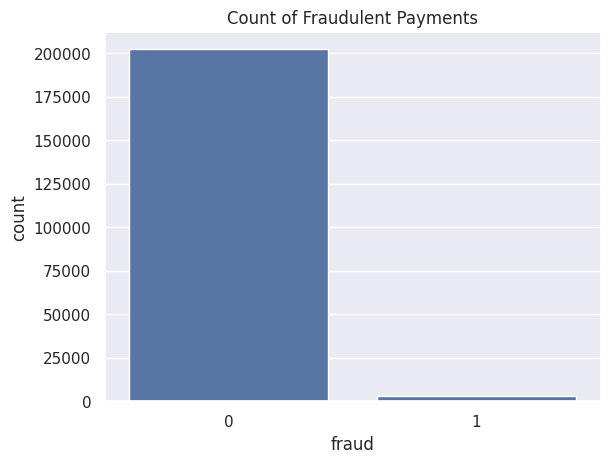

Number of normal examples:  202255
Number of fradulent examples:  2818


In [ ]:
# Create two dataframes with fraud and non-fraud data
df_fraud = data.loc[data.fraud == 1]
df_non_fraud = data.loc[data.fraud == 0]
sns.countplot(x="fraud",data=data)
plt.title("Count of Fraudulent Payments")
plt.show()
print("Number of normal examples: ",df_non_fraud.fraud.count())
print("Number of fradulent examples: ",df_fraud.fraud.count())
#print(data.fraud.value_counts()) # does the same thing above

In [ ]:
print("Mean feature values per category",data.groupby('category')[['amount','fraud']].mean())

Mean feature values per category                               amount     fraud
category                                      
'es_barsandrestaurants'    43.492302  0.016575
'es_contents'              44.707045  0.000000
'es_fashion'               65.089198  0.019257
'es_food'                  36.683567  0.000000
'es_health'               143.897688  0.132565
'es_home'                 173.107405  0.167759
'es_hotelservices'        201.766190  0.294931
'es_hyper'                 45.013641  0.036413
'es_leisure'              293.686600  0.930000
'es_otherservices'        116.968874  0.178641
'es_sportsandtoys'        206.869224  0.454294
'es_tech'                 114.295713  0.066914
'es_transportation'        27.009437  0.000000
'es_travel'              2254.650831  0.741214
'es_wellnessandbeauty'     66.186895  0.046897


In [ ]:
# Create two dataframes with fraud and non-fraud data
pd.concat([df_fraud.groupby('category')['amount'].mean(),df_non_fraud.groupby('category')['amount'].mean(),\
data.groupby('category')['fraud'].mean()*100],keys=["Fraudulent","Non-Fraudulent","Percent(%)"],axis=1,\
sort=False).sort_values(by=['Non-Fraudulent'])

,Fraudulent,Non-Fraudulent,Percent(%)
category,,,
'es_transportation',NaN,27.009437,0.000000
'es_food',NaN,36.683567,0.000000
'es_hyper',171.656667,40.227971,3.641268
'es_barsandrestaurants',170.909444,41.344822,1.657459
'es_contents',NaN,44.707045,0.000000
'es_wellnessandbeauty',248.039586,57.238909,4.689704
'es_fashion',251.912143,61.420865,1.925722
'es_otherservices',310.367826,74.905745,17.864078
'es_leisure',309.907043,78.186429,93.000000


<ipython-input-8-142d8c11764e>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


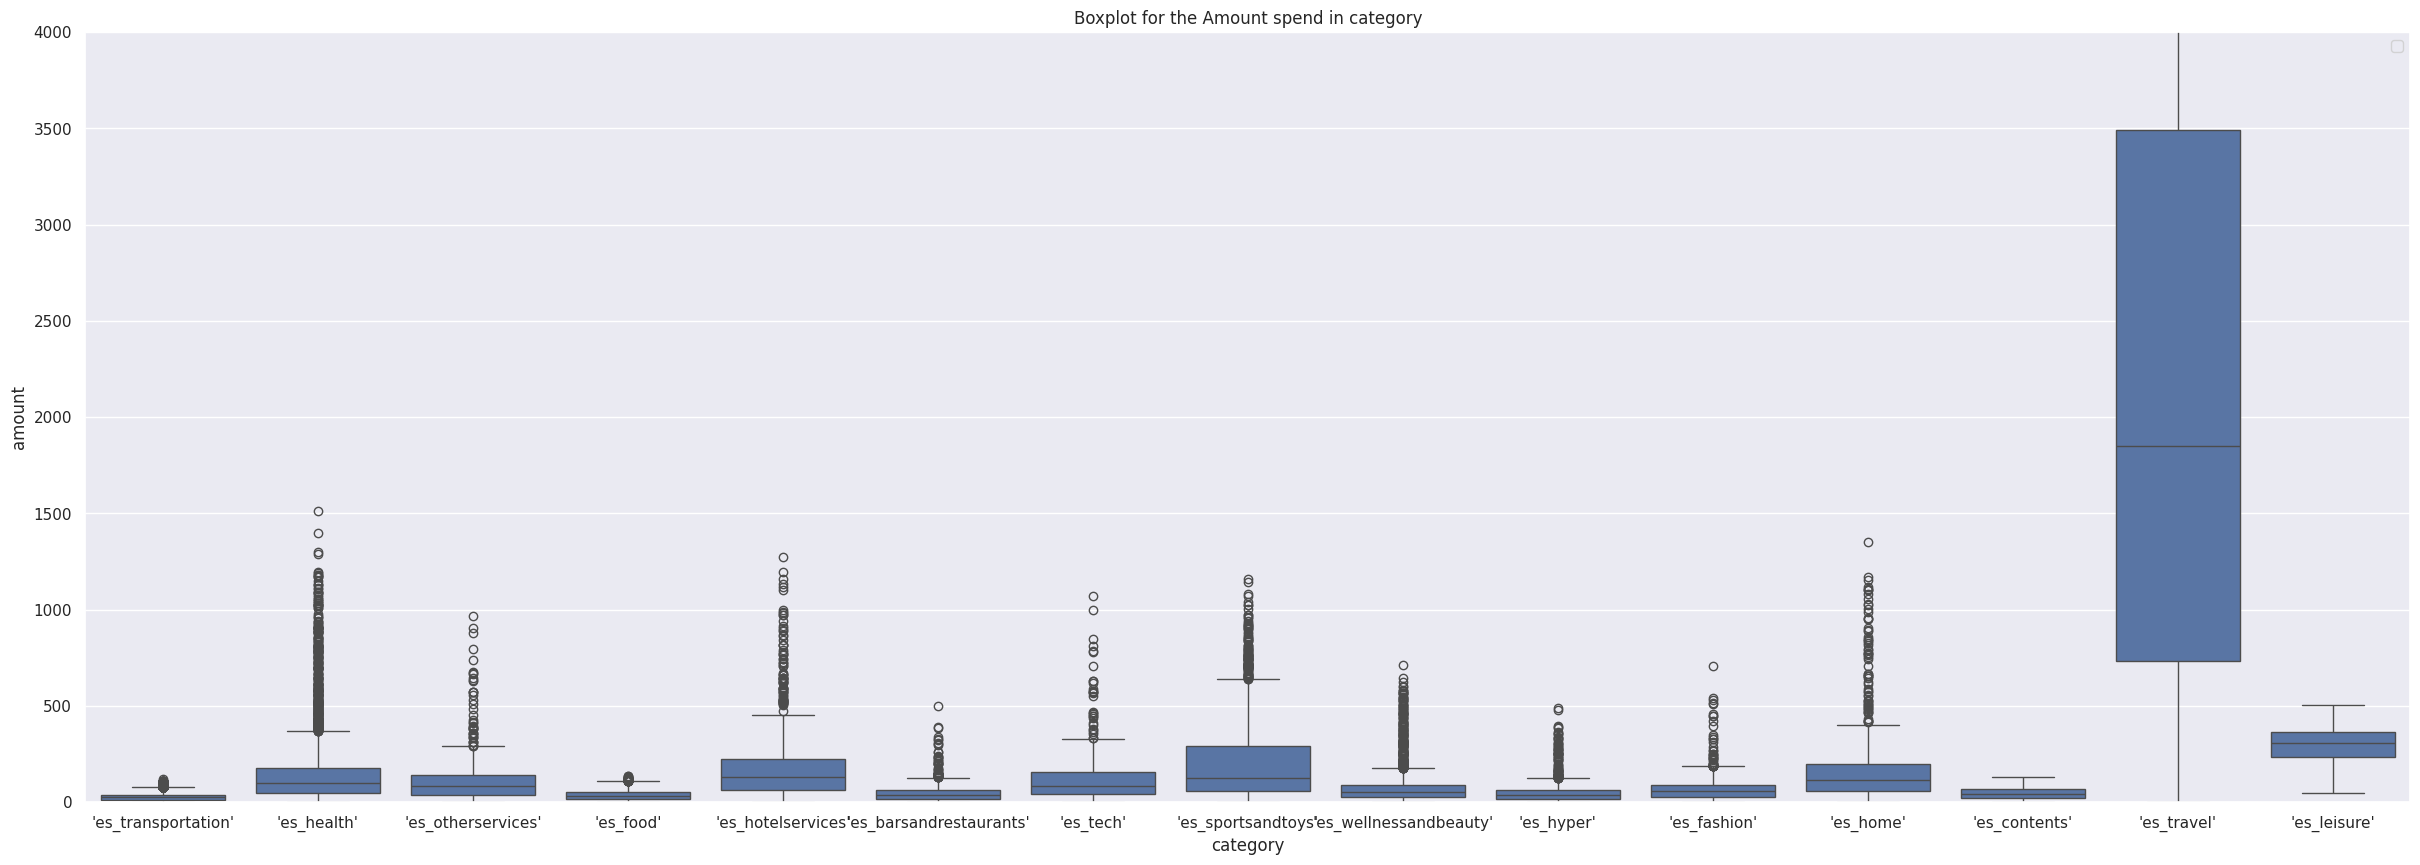

In [ ]:
# Plot histograms of the amounts in fraud and non-fraud data
plt.figure(figsize=(30,10))
sns.boxplot(x=data.category,y=data.amount)
plt.title("Boxplot for the Amount spend in category")
plt.ylim(0,4000)
plt.legend()
plt.show()

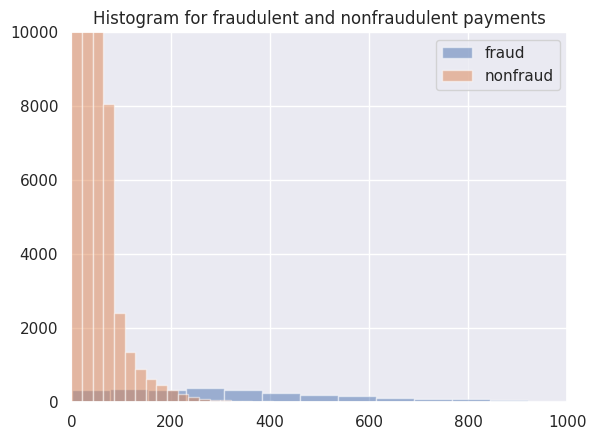

In [ ]:
# Plot histograms of the amounts in fraud and non-fraud data
plt.hist(df_fraud.amount, alpha=0.5, label='fraud',bins=100)
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud',bins=100)
plt.title("Histogram for fraudulent and nonfraudulent payments")
plt.ylim(0,10000)
plt.xlim(0,1000)
plt.legend()
plt.show()

In [ ]:
print((data.groupby('age')['fraud'].mean()*100).reset_index().rename(columns={'age':'Age','fraud' : 'Fraud Percent'}).sort_values(by='Fraud Percent'))

   Age  Fraud Percent
7  'U'       0.000000
1  '1'       1.103829
6  '6'       1.233099
2  '2'       1.233160
5  '5'       1.378744
3  '3'       1.499352
4  '4'       1.600299
0  '0'       3.452855


In [ ]:
print("Unique zipCodeOri values: ",data.zipcodeOri.nunique())
print("Unique zipMerchant values: ",data.zipMerchant.nunique())
# dropping zipcodeori and zipMerchant since they have only one unique value
data_reduced = data.drop(['zipcodeOri','zipMerchant'],axis=1)

Unique zipCodeOri values:  1
Unique zipMerchant values:  1


In [ ]:
data_reduced.columns
# turning object columns type to categorical for easing the transformation process
col_categorical = data_reduced.select_dtypes(include= ['object']).columns
for col in col_categorical:
  data_reduced[col] = data_reduced[col].astype('category')
# categorical values ==> numeric values
data_reduced[col_categorical] = data_reduced[col_categorical].apply(lambda x: x.cat.codes)
data_reduced.head(5)


,step,customer,age,gender,merchant,category,amount,fraud
0,0,209,4,2,30,12,4.55,0
1,0,2745,2,2,30,12,39.68,0
2,0,2280,4,1,18,12,26.89,0
3,0,1647,3,2,30,12,17.25,0
4,0,3576,5,2,30,12,35.72,0


In [ ]:
X = data_reduced.drop(['fraud'],axis=1)
y = data['fraud']
print(X.head(),"\n")
print(y.head())

   step  customer  age  gender  merchant  category  amount
0     0       209    4       2        30        12    4.55
1     0      2745    2       2        30        12   39.68
2     0      2280    4       1        18        12   26.89
3     0      1647    3       2        30        12   17.25
4     0      3576    5       2        30        12   35.72 

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64


In [ ]:
y[y==1].count()

2818

In [ ]:
# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
# Print the count of each class after resampling
print(pd.Series(y_res).value_counts())

fraud
0    202255
1    202255
Name: count, dtype: int64


In [ ]:
# I won't do cross validation since we have a lot of instances
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=42,shuffle=True,stratify=y_res)
# %% Function for plotting ROC_AUC curve
def plot_roc_auc(y_test, preds):
  '''
Takes actual and predicted(probabilities) as input and plots the Receiver
Operating Characteristic (ROC) curve
'''
  fpr, tpr, threshold = roc_curve(y_test, preds)
  roc_auc = auc(fpr, tpr)
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()


In [ ]:
# The base score should be better than predicting always non-fraduelent
print("Base accuracy score we must beat is: ",
df_non_fraud.fraud.count()/ np.add(df_non_fraud.fraud.count(),df_fraud.fraud.count()) * 100)



Base accuracy score we must beat is:  98.6258551832762


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   15.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


Classification Report for Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98     60677
           1       0.97      0.99      0.98     60676

    accuracy                           0.98    121353
   macro avg       0.98      0.98      0.98    121353
weighted avg       0.98      0.98      0.98    121353

Confusion Matrix of Random Forest Classifier: 
 [[58543  2134]
 [  434 60242]]


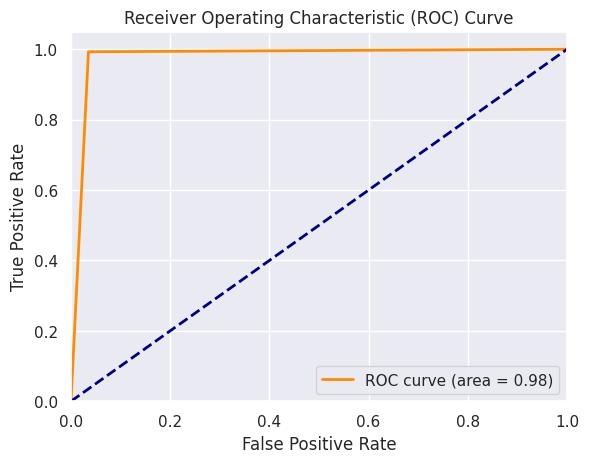

In [ ]:
# %% Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42,verbose=1,class_weight="balanced")
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print("Classification Report for Random Forest Classifier: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of Random Forest Classifier: \n", confusion_matrix(y_test,y_pred))
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Classification Report for XGBoost: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     60677
           1       0.99      1.00      0.99     60676

    accuracy                           0.99    121353
   macro avg       0.99      0.99      0.99    121353
weighted avg       0.99      0.99      0.99    121353

Confusion Matrix of XGBoost: 
 [[60122   555]
 [  220 60456]]


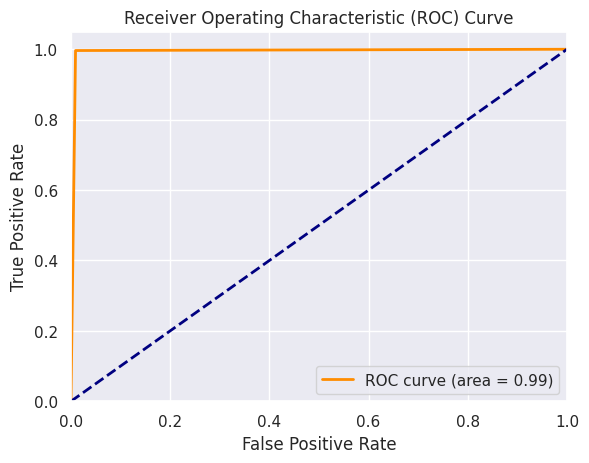

In [ ]:
XGBoost_CLF = xgb.XGBClassifier(max_depth=6, learning_rate=0.05, n_estimators=400,
objective="binary:hinge", booster='gbtree',
n_jobs=-1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0,
subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1,
scale_pos_weight=1, base_score=0.5, random_state=42, verbosity=True)
XGBoost_CLF = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, verbosity=1,
scale_pos_weight=1, base_score=0.5, random_state=42)
XGBoost_CLF.fit(X_train, y_train)
y_pred = XGBoost_CLF.predict(X_test)
print("Classification Report for XGBoost: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of XGBoost: \n", confusion_matrix(y_test,y_pred))
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
